In [213]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib

In [214]:
train_df = pd.read_csv("clean_data_train.csv")
test_df = pd.read_csv("clean_data_test.csv")

In [215]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61471 entries, 0 to 61470
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temp_c       61471 non-null  float64
 1   condition    61471 non-null  object 
 2   wind_kph     61471 non-null  float64
 3   wind_degree  61471 non-null  int64  
 4   pressure_in  61471 non-null  float64
 5   precip_mm    61471 non-null  float64
 6   snow_cm      61471 non-null  float64
 7   humidity     61471 non-null  int64  
 8   cloud        61471 non-null  int64  
 9   feelslike_c  61471 non-null  float64
 10  windchill_c  61471 non-null  float64
 11  heatindex_c  61471 non-null  float64
 12  dewpoint_c   61471 non-null  float64
 13  vis_km       61471 non-null  float64
 14  gust_kph     61471 non-null  float64
 15  uv           61471 non-null  int64  
 16  date         61471 non-null  object 
 17  hour         61471 non-null  int64  
dtypes: float64(11), int64(5), object(2)
memory usa

In [216]:
train_df.head()

,temp_c,condition,wind_kph,wind_degree,pressure_in,precip_mm,snow_cm,humidity,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,vis_km,gust_kph,uv,date,hour
0,11.5,Sunny,4.7,65,30.23,0.00,0.0,54,0,11.5,11.5,11.5,6.2,10.0,8.6,4,2024-10-26,7
1,26.0,Partly cloudy,14.0,268,29.66,0.00,0.0,75,45,28.2,26.0,28.2,21.2,10.0,23.9,0,2024-09-17,3
2,4.0,Moderate/Heavy Rain,19.8,226,29.60,1.35,0.0,90,100,-0.2,-0.2,4.0,2.0,10.0,28.3,0,2024-11-21,2
3,24.8,Sunny,20.9,315,29.87,0.00,0.0,62,6,26.1,24.8,26.1,17.0,10.0,28.0,6,2024-12-25,17
4,30.5,Cloudy/Overcast,17.6,140,29.61,0.00,0.0,84,67,39.9,30.5,39.9,25.5,10.0,26.4,7,2025-04-18,18


In [217]:
numerical_features = [
    'temp_c', 'wind_kph', 'pressure_in', 'precip_mm', 'snow_cm',
    'humidity', 'cloud', 'feelslike_c', 'windchill_c', 'heatindex_c', 'dewpoint_c',
    'vis_km', 'gust_kph', 'uv'
]

# 1. Feature Creation


In [218]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

train_df['month'] = train_df['date'].dt.month
test_df['month'] = test_df['date'].dt.month

In [219]:
train_df.head()

,temp_c,condition,wind_kph,wind_degree,pressure_in,precip_mm,snow_cm,humidity,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,vis_km,gust_kph,uv,date,hour,month
0,11.5,Sunny,4.7,65,30.23,0.00,0.0,54,0,11.5,11.5,11.5,6.2,10.0,8.6,4,2024-10-26,7,10
1,26.0,Partly cloudy,14.0,268,29.66,0.00,0.0,75,45,28.2,26.0,28.2,21.2,10.0,23.9,0,2024-09-17,3,9
2,4.0,Moderate/Heavy Rain,19.8,226,29.60,1.35,0.0,90,100,-0.2,-0.2,4.0,2.0,10.0,28.3,0,2024-11-21,2,11
3,24.8,Sunny,20.9,315,29.87,0.00,0.0,62,6,26.1,24.8,26.1,17.0,10.0,28.0,6,2024-12-25,17,12
4,30.5,Cloudy/Overcast,17.6,140,29.61,0.00,0.0,84,67,39.9,30.5,39.9,25.5,10.0,26.4,7,2025-04-18,18,4


In [220]:
train_df['hour_sin'] = np.sin(2 * np.pi * train_df['hour'] / 24)
train_df['hour_cos'] = np.cos(2 * np.pi * train_df['hour'] / 24)
test_df['hour_sin'] = np.sin(2 * np.pi * test_df['hour'] / 24)
test_df['hour_cos'] = np.cos(2 * np.pi * test_df['hour'] / 24)

train_df['month_sin'] = np.sin(2 * np.pi * train_df['month'] / 12)
train_df['month_cos'] = np.cos(2 * np.pi * train_df['month'] / 12)
test_df['month_sin'] = np.sin(2 * np.pi * test_df['month'] / 12)
test_df['month_cos'] = np.cos(2 * np.pi * test_df['month'] / 12)


train_df['wind_degree_sin'] = np.sin(2 * np.pi * train_df['wind_degree'] / 360)
train_df['wind_degree_cos'] = np.cos(2 * np.pi * train_df['wind_degree'] / 360)
test_df['wind_degree_sin'] = np.sin(2 * np.pi * test_df['wind_degree'] / 360)
test_df['wind_degree_cos'] = np.cos(2 * np.pi * test_df['wind_degree'] / 360)

In [221]:
numerical_features.extend(['hour_sin', 'hour_cos','month_cos', 'month_sin', 'wind_degree_sin', 'wind_degree_cos'])

In [222]:
train_df = train_df.drop(columns=['date', 'hour', 'month', 'wind_degree'])
test_df = test_df.drop(columns=['date', 'hour', 'month', 'wind_degree'])

In [223]:
train_df.head()

,temp_c,condition,wind_kph,pressure_in,precip_mm,snow_cm,humidity,cloud,feelslike_c,windchill_c,...,dewpoint_c,vis_km,gust_kph,uv,hour_sin,hour_cos,month_sin,month_cos,wind_degree_sin,wind_degree_cos
0,11.5,Sunny,4.7,30.23,0.00,0.0,54,0,11.5,11.5,...,6.2,10.0,8.6,4,0.965926,-2.588190e-01,-8.660254e-01,5.000000e-01,0.906308,0.422618
1,26.0,Partly cloudy,14.0,29.66,0.00,0.0,75,45,28.2,26.0,...,21.2,10.0,23.9,0,0.707107,7.071068e-01,-1.000000e+00,-1.836970e-16,-0.999391,-0.034899
2,4.0,Moderate/Heavy Rain,19.8,29.60,1.35,0.0,90,100,-0.2,-0.2,...,2.0,10.0,28.3,0,0.500000,8.660254e-01,-5.000000e-01,8.660254e-01,-0.719340,-0.694658
3,24.8,Sunny,20.9,29.87,0.00,0.0,62,6,26.1,24.8,...,17.0,10.0,28.0,6,-0.965926,-2.588190e-01,-2.449294e-16,1.000000e+00,-0.707107,0.707107
4,30.5,Cloudy/Overcast,17.6,29.61,0.00,0.0,84,67,39.9,30.5,...,25.5,10.0,26.4,7,-1.000000,-1.836970e-16,8.660254e-01,-5.000000e-01,0.642788,-0.766044


# 2. Data Normalization/Standardization

* Fit scaler on Train

In [224]:
scaler = StandardScaler()
scaler.fit(train_df[numerical_features])

StandardScaler()

* Transform Train and Test

In [225]:
train_df[numerical_features] = scaler.transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

# 3. Encoding Categorical Features

* Fit and transform on train

In [226]:
label_encoder = LabelEncoder()
train_df['condition'] = label_encoder.fit_transform(train_df['condition'])

* Transform on test

In [227]:
test_df['condition'] = label_encoder.transform(test_df['condition'])

* Save label encoder

In [228]:
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [229]:
train_df.head()

,temp_c,condition,wind_kph,pressure_in,precip_mm,snow_cm,humidity,cloud,feelslike_c,windchill_c,...,dewpoint_c,vis_km,gust_kph,uv,hour_sin,hour_cos,month_sin,month_cos,wind_degree_sin,wind_degree_cos
0,-0.896166,9,-1.084688,1.433155,-0.204486,-0.032459,-0.462354,-1.128574,-0.807202,-0.756593,...,-0.595894,0.237363,-1.074408,0.360872,1.368538,-0.365786,-1.221323,0.712844,1.390667,0.498434
1,0.504758,7,0.312168,-0.981405,-0.204486,-0.032459,0.602726,0.089542,0.484804,0.508000,...,0.709253,0.237363,0.407023,-0.905887,1.002138,0.998846,-1.411215,0.007278,-1.413503,-0.128122
2,-1.620782,6,1.183325,-1.235569,1.268212,-0.032459,1.363498,1.578351,-1.712379,-1.776990,...,-0.961335,0.237363,0.833055,-0.905887,0.708945,1.223362,-0.702526,1.229354,-1.001417,-1.031642
3,0.388819,9,1.348544,-0.091830,-0.204486,-0.032459,-0.056609,-0.966159,0.322336,0.403344,...,0.343811,0.237363,0.804008,0.994252,-1.366309,-0.365786,0.006164,1.418410,-0.983417,0.888032
4,0.939527,1,0.852886,-1.193208,-0.204486,-0.032459,1.059190,0.685066,1.389981,0.900461,...,1.083395,0.237363,0.649087,1.310942,-1.414546,-0.000134,1.233651,-0.698288,1.002906,-1.129403


# 4. Correlation Analysis

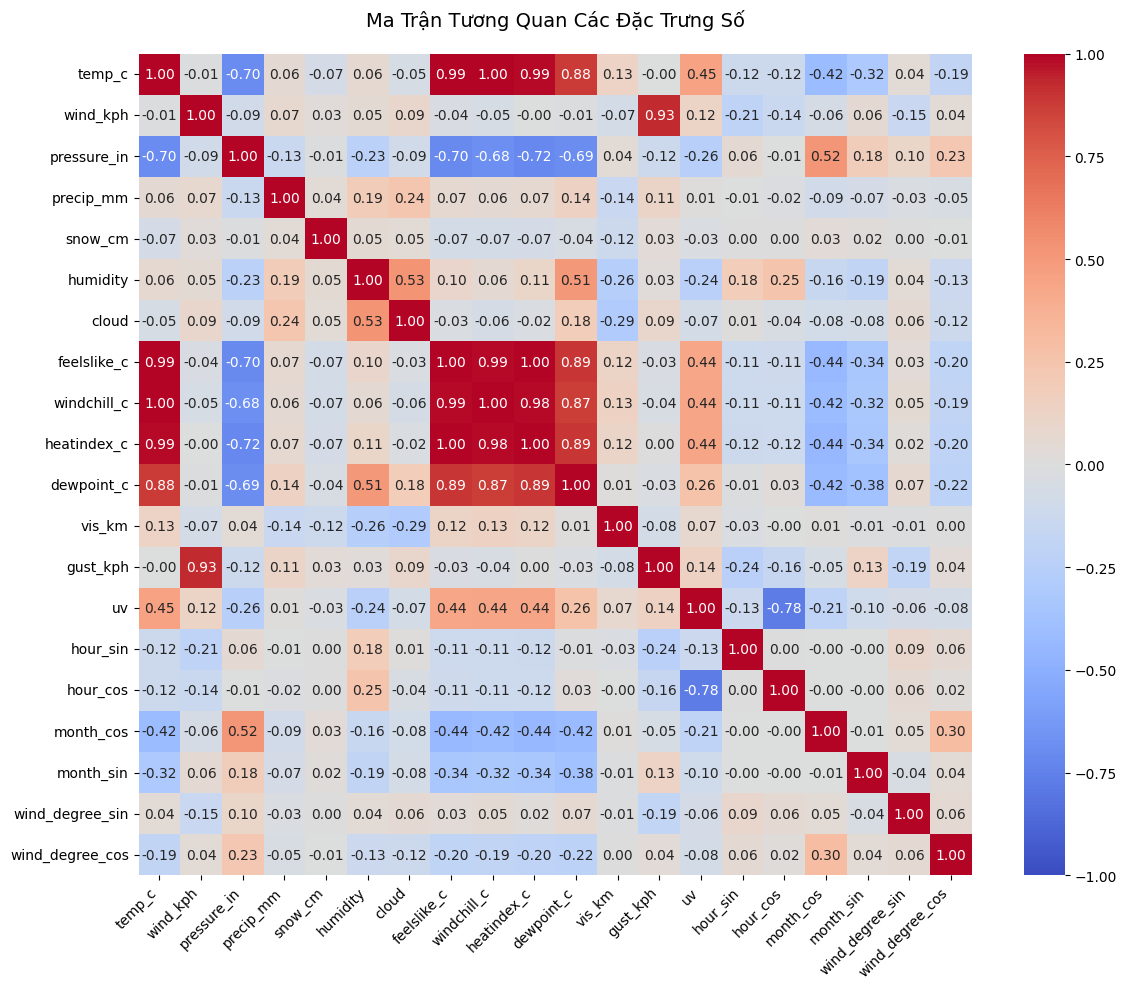

In [230]:
correlation_matrix = train_df[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title("Ma Trận Tương Quan Các Đặc Trưng Số", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [231]:
to_drop = ['feelslike_c', 'windchill_c', 'heatindex_c', 'gust_kph']

train_df.drop(columns=to_drop, inplace=True)
test_df.drop(columns=to_drop, inplace=True)

numerical_features = [col for col in numerical_features if col not in to_drop]

train_df.head()

,temp_c,condition,wind_kph,pressure_in,precip_mm,snow_cm,humidity,cloud,dewpoint_c,vis_km,uv,hour_sin,hour_cos,month_sin,month_cos,wind_degree_sin,wind_degree_cos
0,-0.896166,9,-1.084688,1.433155,-0.204486,-0.032459,-0.462354,-1.128574,-0.595894,0.237363,0.360872,1.368538,-0.365786,-1.221323,0.712844,1.390667,0.498434
1,0.504758,7,0.312168,-0.981405,-0.204486,-0.032459,0.602726,0.089542,0.709253,0.237363,-0.905887,1.002138,0.998846,-1.411215,0.007278,-1.413503,-0.128122
2,-1.620782,6,1.183325,-1.235569,1.268212,-0.032459,1.363498,1.578351,-0.961335,0.237363,-0.905887,0.708945,1.223362,-0.702526,1.229354,-1.001417,-1.031642
3,0.388819,9,1.348544,-0.091830,-0.204486,-0.032459,-0.056609,-0.966159,0.343811,0.237363,0.994252,-1.366309,-0.365786,0.006164,1.418410,-0.983417,0.888032
4,0.939527,1,0.852886,-1.193208,-0.204486,-0.032459,1.059190,0.685066,1.083395,0.237363,1.310942,-1.414546,-0.000134,1.233651,-0.698288,1.002906,-1.129403


In [232]:
train_df['dewpoint_depression'] = train_df['temp_c'] - train_df['dewpoint_c']
test_df['dewpoint_depression'] = test_df['temp_c'] - test_df['dewpoint_c']

train_df.drop(columns=['dewpoint_c'], inplace=True)
test_df.drop(columns=['dewpoint_c'], inplace=True)

In [233]:
to_remove = ['dewpoint_c']
to_add = ['dewpoint_depression']

numerical_features = [col for col in numerical_features if col not in to_remove] + to_add
print(numerical_features)

['temp_c', 'wind_kph', 'pressure_in', 'precip_mm', 'snow_cm', 'humidity', 'cloud', 'vis_km', 'uv', 'hour_sin', 'hour_cos', 'month_cos', 'month_sin', 'wind_degree_sin', 'wind_degree_cos', 'dewpoint_depression']


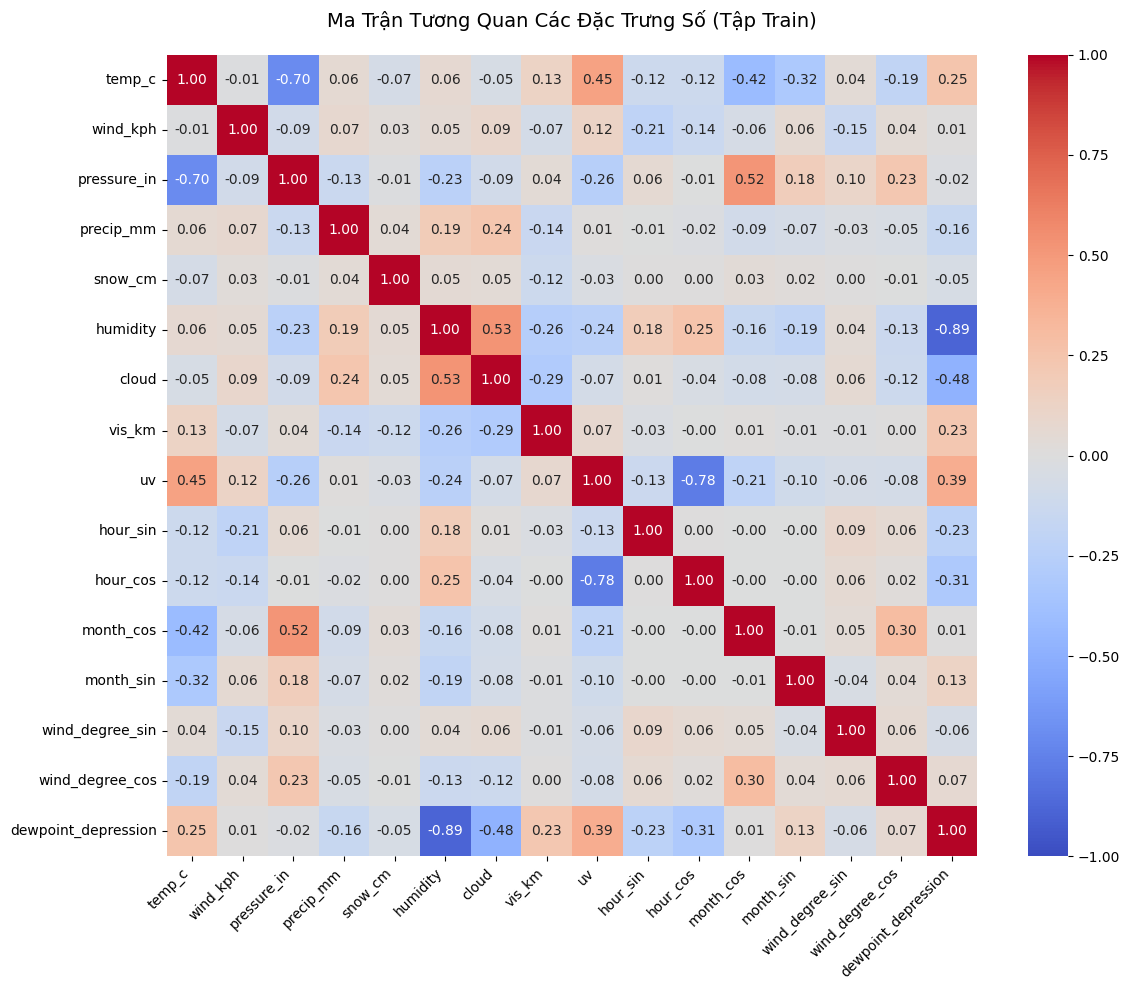

In [234]:
correlation_matrix = train_df[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title("Ma Trận Tương Quan Các Đặc Trưng Số (Tập Train)", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X_train = train_df.drop(columns=['condition'])
y_train = train_df['condition']
X_test = test_df.drop(columns=['condition'])
y_test = test_df['condition']

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Báo cáo phân loại trên tập test:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Báo cáo phân loại trên tập test:
                     precision    recall  f1-score   support

              Clear       1.00      0.99      1.00      6150
    Cloudy/Overcast       0.99      1.00      1.00      5429
            Drizzle       0.99      0.99      0.99      2710
           Fog/Mist       1.00      0.15      0.27        13
      Freezing Rain       0.98      0.98      0.98       106
         Light Rain       1.00      0.13      0.23        47
Moderate/Heavy Rain       0.97      1.00      0.99      1870
      Partly cloudy       0.98      0.99      0.99      3987
               Snow       1.00      0.97      0.99        39
              Sunny       1.00      1.00      1.00      5981
            Thunder       1.00      0.15      0.27        13

           accuracy                           0.99     26345
          macro avg       0.99      0.76      0.79     26345
       weighted avg       0.99      0.99      0.99     26345




Mức độ quan trọng của các đặc trưng:
                Feature  Importance
3             precip_mm    0.228950
6                 cloud    0.196091
0                temp_c    0.082607
8                    uv    0.063853
15  dewpoint_depression    0.063726
4               snow_cm    0.062616
5              humidity    0.058440
7                vis_km    0.046240
1              wind_kph    0.036705
10             hour_cos    0.033725
2           pressure_in    0.028296
14      wind_degree_cos    0.022653
13      wind_degree_sin    0.022198
11            month_sin    0.021167
12            month_cos    0.019722
9              hour_sin    0.013012


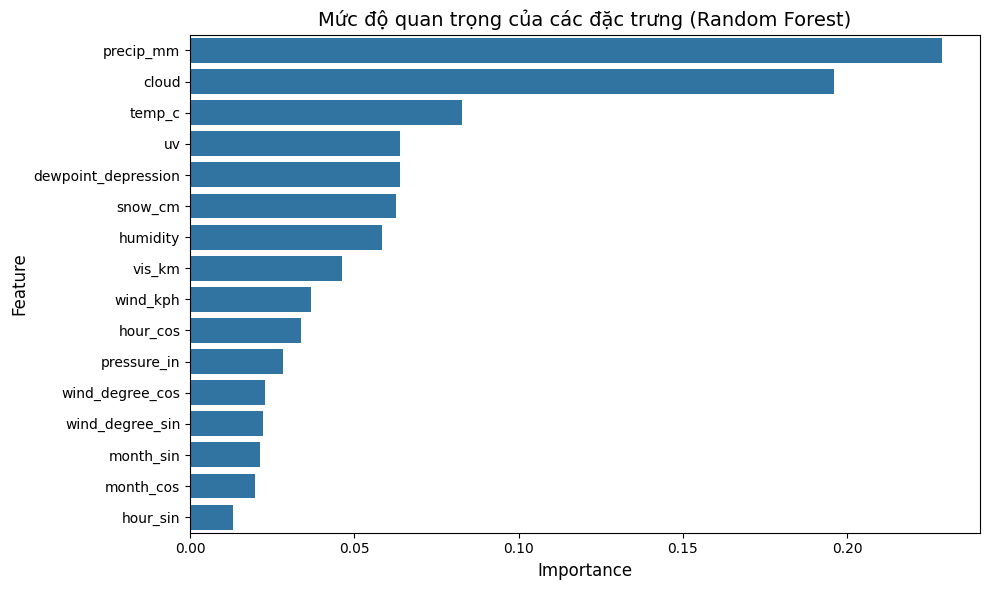

In [236]:
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Tạo DataFrame để hiển thị mức độ quan trọng
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# In bảng mức độ quan trọng
print("\nMức độ quan trọng của các đặc trưng:")
print(importance_df)

# Vẽ biểu đồ mức độ quan trọng
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Mức độ quan trọng của các đặc trưng (Random Forest)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

In [237]:
X_train = train_df.drop(columns=['condition', 'month_cos', 'month_sin'])
y_train = train_df['condition']
X_test = test_df.drop(columns=['condition', 'month_cos', 'month_sin'])
y_test = test_df['condition']

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Báo cáo phân loại trên tập test:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Báo cáo phân loại trên tập test:
                     precision    recall  f1-score   support

              Clear       1.00      0.99      1.00      6150
    Cloudy/Overcast       0.99      1.00      1.00      5429
            Drizzle       0.99      0.99      0.99      2710
           Fog/Mist       1.00      0.08      0.14        13
      Freezing Rain       0.99      0.98      0.99       106
         Light Rain       1.00      0.06      0.12        47
Moderate/Heavy Rain       0.97      1.00      0.99      1870
      Partly cloudy       0.98      0.99      0.99      3987
               Snow       1.00      0.97      0.99        39
              Sunny       1.00      1.00      1.00      5981
            Thunder       1.00      0.08      0.14        13

           accuracy                           0.99     26345
          macro avg       0.99      0.74      0.76     26345
       weighted avg       0.99      0.99      0.99     26345



In [238]:
train_df.to_csv('processed_data_train.csv', index=False)
test_df.to_csv('processed_data_test.csv', index=False)